In [75]:
import pandas as pd
import numpy as np
from plotnine import *
from warnings import filterwarnings
ignore = filterwarnings('ignore')

# Pre-Post Analysis

## Florida 

In [62]:
# Read in the data
df = pd.read_parquet('./ship_pop.parquet')
df.head()

,FIPS,year,BUYER_COUNTY,BUYER_STATE,opioid_converted_grams,population
index,,,,,,
0,45001,2006.0,ABBEVILLE,SC,3136.215389,25440.0
1,22001,2006.0,ACADIA,LA,22401.553115,59585.0
2,51001,2006.0,ACCOMACK,VA,4073.851376,38580.0
3,16001,2006.0,ADA,ID,86952.634072,360869.0
4,19001,2006.0,ADAIR,IA,1129.828425,7677.0


In [63]:
# calculate the opioide per capita
df["opioid_per_capita"] = df["opioid_converted_grams"] / df["population"]
df.head()

,FIPS,year,BUYER_COUNTY,BUYER_STATE,opioid_converted_grams,population,opioid_per_capita
index,,,,,,,
0,45001,2006.0,ABBEVILLE,SC,3136.215389,25440.0,0.123279
1,22001,2006.0,ACADIA,LA,22401.553115,59585.0,0.375960
2,51001,2006.0,ACCOMACK,VA,4073.851376,38580.0,0.105595
3,16001,2006.0,ADA,ID,86952.634072,360869.0,0.240953
4,19001,2006.0,ADAIR,IA,1129.828425,7677.0,0.147171


In [77]:
# add binary of whether the state is before or after 2010 (policy change) 
df_fl = df[df["BUYER_STATE"] == "FL"]
df_fl.loc[:,"Policy Change"] = df_fl["year"] > 2010
df_fl.loc[:,"Years from Policy Change"] = df_fl["year"] - 2010

# Pre-Post

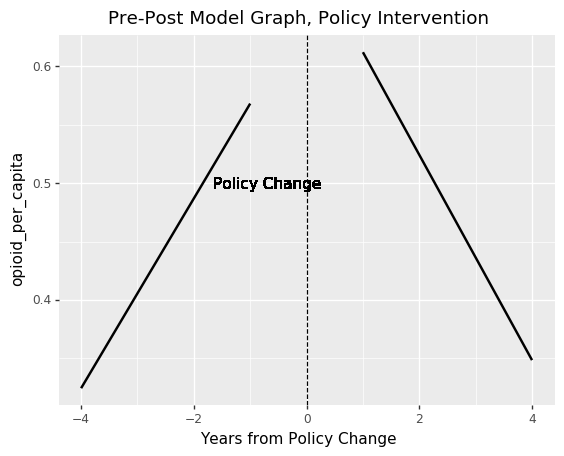

In [65]:
treated_success = df_fl[df_fl["Policy Change"]]
g = (
    ggplot(treated_success, aes(x="Years from Policy Change", y="opioid_per_capita"))
    
    + geom_smooth(
        method="lm",
        data=df_fl[df_fl["Years from Policy Change"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=treated_success[treated_success["Years from Policy Change"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=0.5, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Policy Intervention")
)
#g.save("images/prepost_successful.pdf")
print(g)

From the output of the graph, we can see the slope of regression model of opioid convert amount per capita is positive before the policy became effective, but changed to negative after the date the policy became effect. This means that the convert amoungt per capita increased year by year before the policy change and started to decrease annually after the policy effective date. Therefore, we may conclude that The policy is effective in Florida according to pre-post analysis.

## Texas

In [66]:
df_tx = df[df["BUYER_STATE"] == "TX"]
df_tx.head()

,FIPS,year,BUYER_COUNTY,BUYER_STATE,opioid_converted_grams,population,opioid_per_capita
index,,,,,,,
69,48001,2006.0,ANDERSON,TX,14731.290754,56381.0,0.261281
71,48003,2006.0,ANDREWS,TX,1598.281450,12868.0,0.124206
73,48005,2006.0,ANGELINA,TX,19714.659447,82097.0,0.240139
83,48007,2006.0,ARANSAS,TX,4512.872972,24388.0,0.185045
91,48011,2006.0,ARMSTRONG,TX,57.210300,2093.0,0.027334


In [76]:
df_tx.loc[:,"Policy Change"] = df_tx.loc[:,"year"] > 2008
df_tx.loc[:,"Years from Policy Change"] = df_tx.loc[:,"year"] - 2008

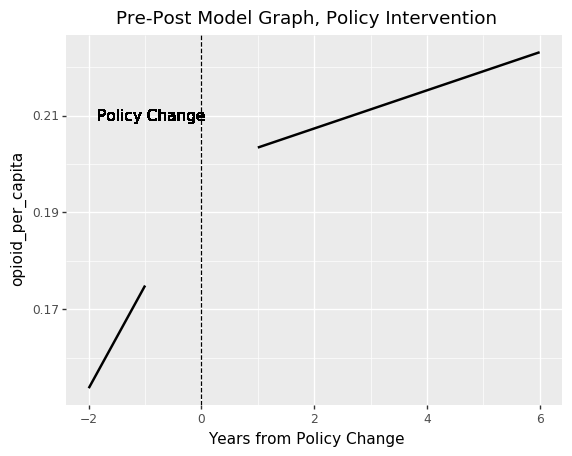

In [68]:
treated_success = df_tx[df_tx["Policy Change"]]
g = (
    ggplot(treated_success, aes(x="Years from Policy Change", y="opioid_per_capita"))
    
    + geom_smooth(
        method="lm",
        data=df_tx[df_tx["Years from Policy Change"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=treated_success[treated_success["Years from Policy Change"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.9, y=0.21
                , label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Policy Intervention")
)
#g.save("images/prepost_successful.pdf")
print(g)

From the output graph, we can see the slope of opioid converted amount per capita are positive for both before and after policy change. However, the gradient decreased after year 2008 when the policy went to effective. Therefore, we concluded that the policy restricts the opioid in Texas. But the effect might be less obvious than Florida. 

### Washington

In [69]:
df_wa = df[df["BUYER_STATE"] == "WA"]
df_wa.head()

,FIPS,year,BUYER_COUNTY,BUYER_STATE,opioid_converted_grams,population,opioid_per_capita
index,,,,,,,
18,53001,2006.0,ADAMS,WA,2424.598848,16615.0,0.145928
100,53003,2006.0,ASOTIN,WA,8202.401307,21108.0,0.388592
195,53005,2006.0,BENTON,WA,47357.689661,157577.0,0.300537
466,53007,2006.0,CHELAN,WA,23476.266260,69919.0,0.335764
516,53009,2006.0,CLALLAM,WA,38022.444306,69671.0,0.545743


In [78]:
df_wa.loc[:,"Policy Change"] = df_wa["year"] > 2012
df_wa.loc[:,"Years from Policy Change"] = df_wa["year"] - 2012

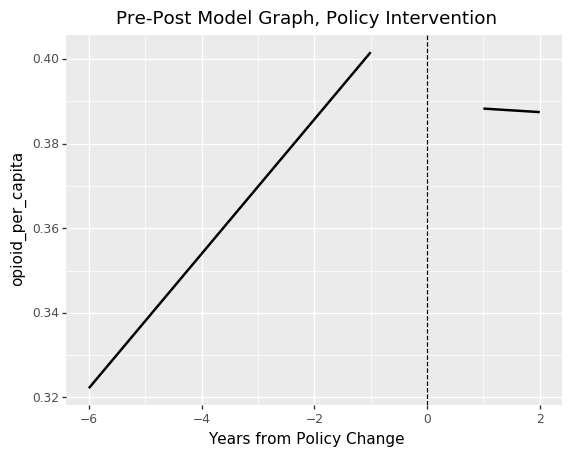

In [71]:
treated_success = df_wa[df_wa["Policy Change"]]
g = (
    ggplot(treated_success, aes(x="Years from Policy Change", y="opioid_per_capita"))
    
    + geom_smooth(
        method="lm",
        data=df_wa[df_wa["Years from Policy Change"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=treated_success[treated_success["Years from Policy Change"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.9, y=0.21
                , label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Policy Intervention")
)
#g.save("images/prepost_successful.pdf")
print(g)

From the output, we can find that the slope of opioid conveted amount is positive before the date of policy being effective and became negative after 2012 in which year the policy became effective. Even though the gradient indicates that the decreasing speed is not high, but the overall trend is totally different from the previous years. Hence, we conclude that the policy has positive influence on the opioid converted amount restriction.

## Diff-in-Diff

### Florida

In [88]:
# Select the states that we want to use as control group
florida_compare = df[df["BUYER_STATE"].isin(["GA", "NC", "SC"])]
florida_compare["Policy Change"] = florida_compare["year"] > 2010
florida_compare["Years from Policy Change"] = florida_compare["year"] - 2010
florida_compare["Compare"] = "Control Group"
df_fl["Compare"] = "Florida"

We selected Georgia, North Corarlina, and South Carolina since those three states are close to Florida and have similar weather

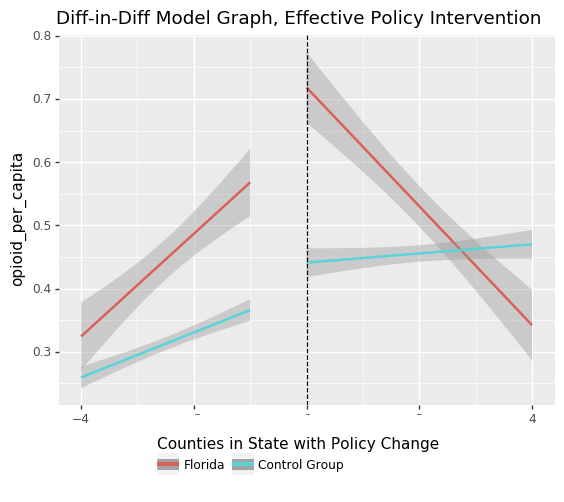

In [90]:
success_model = df_fl[["Policy Change","Years from Policy Change","opioid_per_capita","Compare"]].copy()

g = (
    ggplot(
        success_model,
        aes(x="Years from Policy Change", y="opioid_per_capita", color="Compare"),
    )
    + geom_smooth(
        method="lm", data=success_model[success_model["Years from Policy Change"] < 0]
    )
    + geom_smooth(
        method="lm", data=success_model[success_model["Years from Policy Change"] >= 0]
    )
    + geom_smooth(
        method="lm", data=florida_compare[florida_compare ["Years from Policy Change"] < 0]
    )
    + geom_smooth(
        method="lm", data=florida_compare[florida_compare["Years from Policy Change"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy Change", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
print(g)


From the output, we can see that the slope of control groups is still positive but the slope oof Florida opioid convert amount annual increase decreased to negative. Therefore, we may conclude that the decrease of the opioid per caipta in Florida after 2010 is because of the policy which means the policy is effective.

## Texas

In [91]:
# Select the states that we want to use as control group
texas_compare = df[df["BUYER_STATE"].isin(["AR", "OK", "NM"])]
texas_compare["Policy Change"] = texas_compare["year"] > 2007
texas_compare["Years from Policy Change"] = texas_compare["year"] - 2007
texas_compare["Compare"] = "Control Group"
df_tx["Compare"] = "Texas"

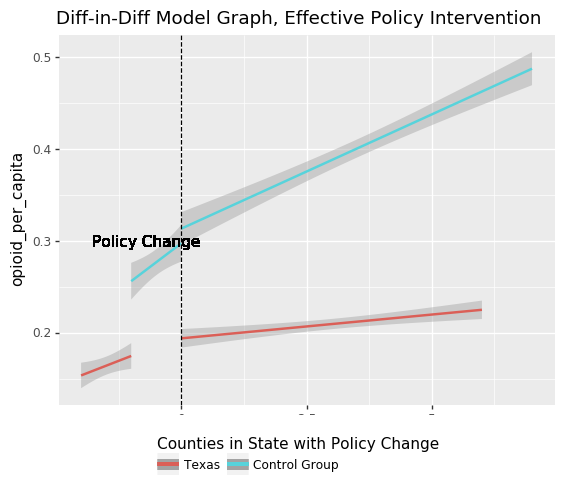

In [100]:
success_model = df_tx[["Policy Change","Years from Policy Change","opioid_per_capita","Compare"]].copy()

g = (
    ggplot(
        success_model,
        aes(x="Years from Policy Change", y="opioid_per_capita", color="Compare"),
    )
    + geom_smooth(
        method="lm", data=success_model[success_model["Years from Policy Change"] < 0]
    )
    + geom_smooth(
        method="lm", data=success_model[success_model["Years from Policy Change"] >= 0]
    )
    + geom_smooth(
        method="lm", data=texas_compare[texas_compare ["Years from Policy Change"] <= 0]
    )
    + geom_smooth(
        method="lm", data=texas_compare[texas_compare["Years from Policy Change"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=0.3, label="Policy Change", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
print(g)

From the output, we can conclude that even though the slope of opioid converted amount per caipita is still positive, but value of gradient is smaller. Also, compare to control grou, the second derivative is negative for Texas, but positive for the control group. Hence, we may conclude that the policy restrict the opioid converted amount.

## Washington

In [112]:
# Select the states that we want to use as control group
wa_compare = df[df["BUYER_STATE"].isin(["OR", "ID", "MT"])]
wa_compare["Policy Change"] = wa_compare["year"] > 2012
wa_compare["Years from Policy Change"] = wa_compare["year"] - 2012
wa_compare["Compare"] = "Control Group"
df_wa["Compare"] = "Washington"

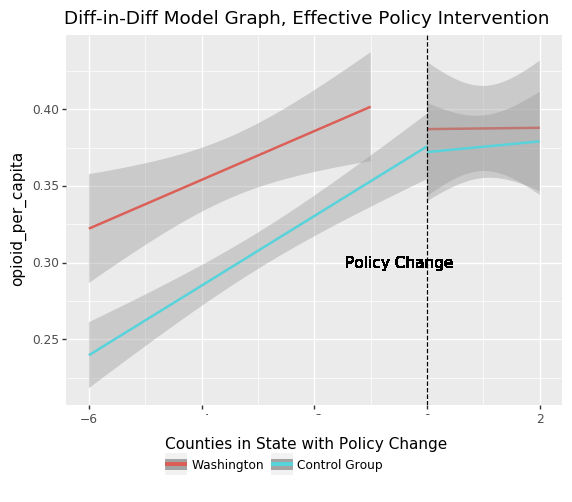

In [113]:
success_model = df_wa[["Policy Change","Years from Policy Change","opioid_per_capita","Compare"]].copy()

g = (
    ggplot(
        success_model,
        aes(x="Years from Policy Change", y="opioid_per_capita", color="Compare"),
    )
    + geom_smooth(
        method="lm", data=success_model[success_model["Years from Policy Change"] < 0]
    )
    + geom_smooth(
        method="lm", data=success_model[success_model["Years from Policy Change"] >= 0]
    )
    + geom_smooth(
        method="lm", data=wa_compare[wa_compare["Years from Policy Change"] <= 0]
    )
    + geom_smooth(
        method="lm", data=wa_compare[wa_compare["Years from Policy Change"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.5, y=0.3, label="Policy Change", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
print(g)

From the output, we can see the gradient change is similar for Washington and neiboughood states. Hence, we cannot conclude the policy is the only factor which deceased the opioid convert amount per capita.